In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid', palette = 'Set2')

In [2]:
df = pd.read_csv('melb_data.csv')

In [3]:
df.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df.describe().loc[:, ['Landsize', 'Price']]

Landsize         Price
count   13580.000000  1.358000e+04
mean      558.416127  1.075684e+06
std      3990.669241  6.393107e+05
min         0.000000  8.500000e+04
25%       177.000000  6.500000e+05
50%       440.000000  9.030000e+05
75%       651.000000  1.330000e+06
max    433014.000000  9.000000e+06

## Landsize :

### Central Tendency

In [6]:
df.Landsize.value_counts()[0]

1939

In [7]:
pd.Series([df.Landsize.mean(), df.Landsize.median(), df.Landsize.value_counts().index[0]], index= ['Mean', 'Median', 'Mode'])

Mean      558.416127
Median    440.000000
Mode        0.000000
dtype: float64

dari segi titik pusat data, terlihat bahwa mean lebih besar daripada median, mengindikasikan bahwa data kemungkinan memiliki right tail.

kemudian yang menarik adalah mode. mode dari Feature Landsize adalah 0 dengan jumlah 1939 data! kemungkinan besar ini disebabkan oleh salah input atau ini 0 diartikan sebagai null value. karena sejatinya tidak mungkin landsize yang merupakan ukuran properti terisi angka 0

namun tentu dibutuhkan analisa lebih lanjut mengenai hal ini. dan kalau memang terbukti bahwa ini adalah null value atau salah input, diperlukan konsultasi lebih lanjut untuk penanganannya, seperti merubah type menjadi NA, diisi dengan average sesuai kategori yang diinginkan, atau dibiarkan saja 0. untuk saat ini saya memilih membiarkan saja tetap 0

### Dispersion

In [8]:
Q1, Q2, Q3 = df.Landsize.quantile(.25), df.Landsize.quantile(.5), df.Landsize.quantile(.75)

IQR = Q3 - Q1
IQR

474.0

In [9]:
pd.Series([round(df.Landsize.var(), 2), round(df.Landsize.std(), 2), IQR], index=['Variance', 'st. Deviation', 'IQR'])

Variance         15925440.99
st. Deviation        3990.67
IQR                   474.00
dtype: float64

Terlihat bahwa standar deviasi yang dihasilkan cukup besar yaitu 3990. ini berarti antara 1 data dan data lainnya rentannya sangat jauh, namun dalam titik ini, tentu kita bisa asumsikan bahwa melihat st. deviasi saja tidaklah cukup. kita perlu memeriksa IQR untuk mengetahui dimana konsentrasi data berada. mungkin dalam hal ini nilai IQR lebih berarti dari St. Deviasi

<AxesSubplot:xlabel='Landsize'>

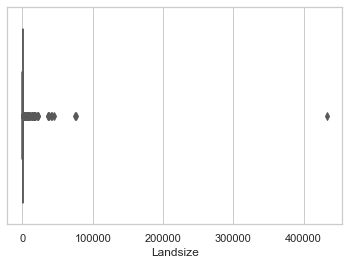

In [10]:
sns.boxplot(df.Landsize)

### Distribution

In [11]:
pd.Series([stats.skew(df.Landsize), stats.kurtosis(df.Landsize, fisher=False)], index = ['Skew', 'Kurtosis'])

Skew           95.226881
Kurtosis    10179.598486
dtype: float64

<AxesSubplot:xlabel='Landsize', ylabel='Density'>

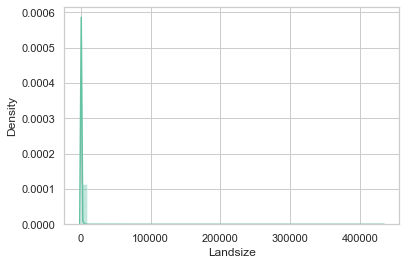

In [12]:
sns.distplot(df.Landsize)

In [13]:
a = 0.05

In [14]:
statistics, pvalue = stats.normaltest(df.Landsize)

if pvalue < a :
    print('Reject H0')
else :
    print('Fail to reject H0') 

Reject H0


Secara Statistics Feature Landsize memiliki distribusi tidak normal

Terlihat jelas disini bahwa data memiliki outliers yang sangat banyak. dengan skew yang sangat tinggi mengindikasikan bahwa distribusi data memiliki positive skew dan kurtosis yang besar yang mengindikasikan bahwa distribusi data adalah type leptokurtic dengan peak yang sangat runcing

## Price

### Central Tendency

In [15]:
pd.Series([round(df.Price.mean(), 2), df.Price.median(), df.Price.value_counts().index[0]], index= ['Mean', 'Median', 'Mode'])

Mean      1075684.08
Median     903000.00
Mode      1100000.00
dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

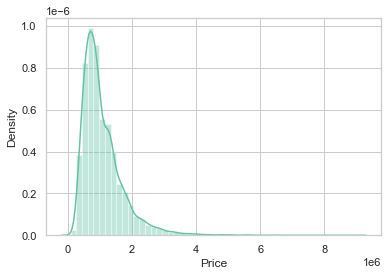

In [16]:
sns.distplot(df.Price)

### Dispersion

In [17]:
Q1, Q2, Q3 = df.Price.quantile(.25), df.Price.quantile(.5), df.Price.quantile(.75)

IQR = Q3 - Q1
IQR

680000.0

In [18]:
df.Price.var(),df.Price.std()

(408718202199.89923, 639310.724296018)

### Distribution

In [19]:
pd.Series([stats.skew(df.Price), stats.kurtosis(df.Price, fisher=False)], index = ['Skew', 'Kurtosis'])

Skew         2.239377
Kurtosis    12.870262
dtype: float64

In [20]:
statistics, pvalue = stats.normaltest(df.Price)

if pvalue < 0.05 :
    print('reject H0')
else :
    print('Fail to reject H0')

reject H0


# No 2

In [21]:
Q1, Q2, Q3 = df.Distance.quantile(.25), df.Distance.quantile(.5), df.Distance.quantile(.75)

IQR = Q3 - Q1
IQR

_lower, _upper = (Q1 - (1.5 * IQR)), (Q3 + (1.5 * IQR))
_lower, _upper

(-4.250000000000002, 23.35)

In [22]:
df.loc[(df.Distance < _lower) | (df.Distance > _upper), 'Distance'].count()

411

Ada 411 data yang berhasil terhitung sebagai outliers menggunakan metode IQR lower dan upper bound

<AxesSubplot:xlabel='Distance'>

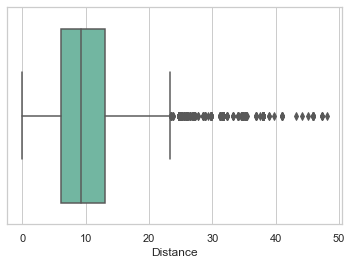

In [23]:
sns.boxplot(df.Distance)

Terlihat dari boxplot diatas bahwa mayoritas atau bahkan semua outliers yang diidentifikasi berada di upper bound. yaitu lebih dari 23.35

# Nomor 3

<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

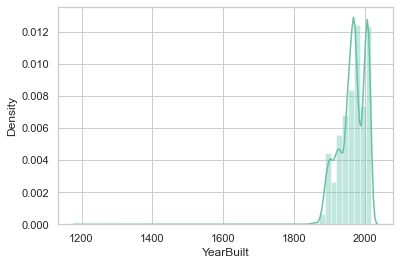

In [24]:
sns.distplot(df.YearBuilt)

Disini terlihat bahwa distribusi data memiliki lebih dari 1 peak, yang berarti bisa dikategorikan sebagai distribusi Bimodal. juga terlihat beberapa outliers. untuk lebih jelas tentang outliers bisa dilakukan plotting menggunakan boxplot

<AxesSubplot:xlabel='YearBuilt'>

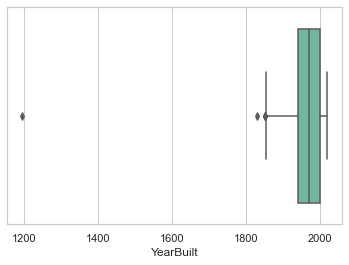

In [25]:
sns.boxplot(df.YearBuilt)

ketika dilakukan plotting menggunakan boxplot bisa dilihat bahwa outliers yang ada teridentifikasi berada di lower bound

# Nomor 4

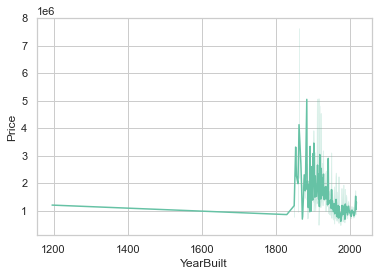

In [26]:
sns.lineplot(x = df.YearBuilt, y = df.Price)

plt.savefig('YearBuildXprice1200.png')

dikarenakan terdapat outliers di lower bound, maka plot yang ditampilkan tampak flat di tahun 1200 sampai 1800. ini terjadi karena terdapat rumah yang di bangun di tahun 1200an namun tidak ada lagi data rumah yang di bangun setelahnya sampai di tahun 1800 keatas. mungkin plot akan lebih valuable bila dilakukan plotting di tahun 1800 keatas 

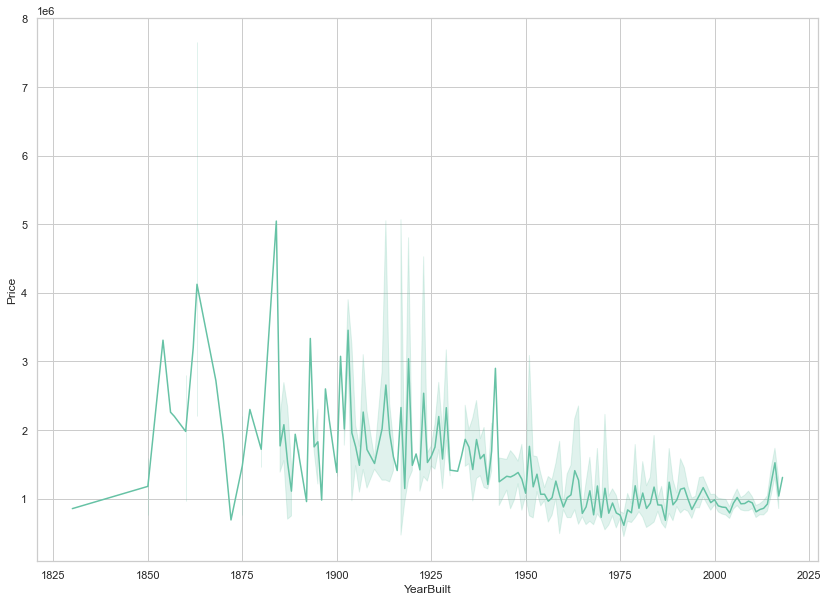

In [44]:
plt.figure(figsize = (14,10))

sns.lineplot(x = df.loc[df.YearBuilt > 1800, 'YearBuilt'], y = df.Price)

plt.savefig('yearbuiltXprice1825.png')

<Figure size 432x288 with 0 Axes>

lineplot diatas memperlihatkan bahwa terjadinya peningkatan pembangunan dari tahun ke tahun, namun juga terjadinya penurunan harga setiap tahun pembangunannya. harga rumah terlihat stabil pada tahun pembangunan 1960an sampai di tahun 2000. dan harga rumah mulai menunjukan peningkatan harga ketika dibangun setelah tahun 2010an

# Nomor 5

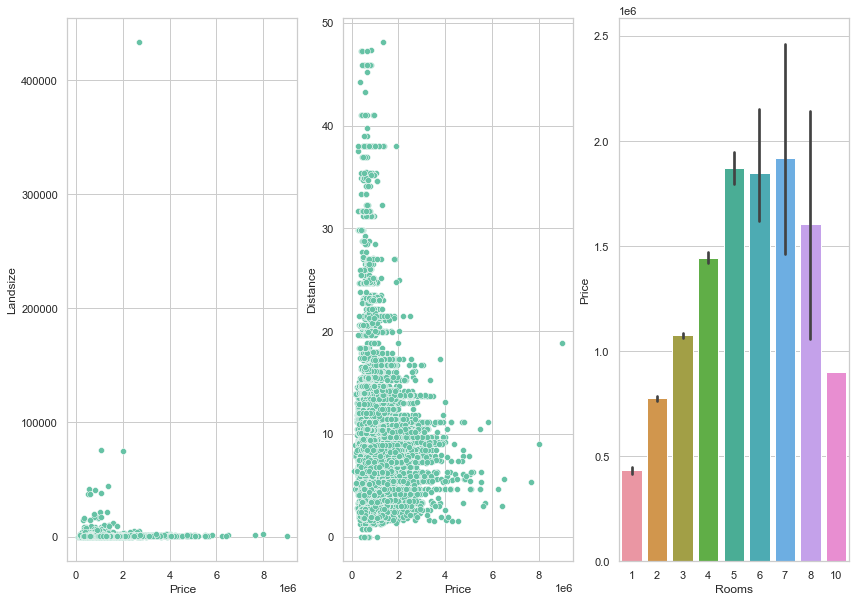

In [43]:
plt.figure(figsize = (14,10))

plt.subplot(1, 3, 1)
sns.scatterplot(df.Price, df.Landsize)

plt.subplot(1, 3, 2)
sns.scatterplot(df.Price, df.Distance)

plt.subplot(1, 3, 3)
sns.barplot(x = df.Rooms, y = df.Price)

plt.savefig('3corr.png')

In [30]:
df.corr(method='spearman').loc[['Landsize', 'Distance', 'Rooms'], ['Price']]

Price
Landsize  0.327200
Distance -0.129990
Rooms     0.539886

metode untuk mencari korelasi diatas menggunakan metode spearman karena berdasarkan normality test yang dilakukan pada tahap sebelumnya diketahui bahwa kolom price memiliki distribusi yang tidak normal

yang menarik adalah pada korelasi antara kolom price dan feature, terjadi penungkatan harga ketika jumlah ruangan bertambah. namun mulai terjadi penurunan ketika jumlah ruangan lebih dari 7. jika anda berniat membangun penginapan, sepertinya akan lebih cocok jika mulai merencanakan untuk investasi properti dengan ruangan yang lebih dari 7

korelasi antara price dan landsize menunjukan korelasi positif yang lemah, namun sepertinya korelasi menurun ketika harga semakin tinggi. sedangkan antara kolom price dan distance hampir tidak menunjukkan adanya korelasi

# Nomor 6

In [31]:
pd.options.display.float_format = '{:,.2f}'.format

In [32]:
df.groupby('Regionname').mean().Price.sort_values(ascending = False)

Regionname
Southern Metropolitan        1,372,963.37
Eastern Metropolitan         1,104,079.63
South-Eastern Metropolitan     922,943.78
Northern Metropolitan          898,171.08
Western Metropolitan           866,420.52
Eastern Victoria               699,980.79
Northern Victoria              594,829.27
Western Victoria               397,523.44
Name: Price, dtype: float64

<AxesSubplot:ylabel='Regionname'>

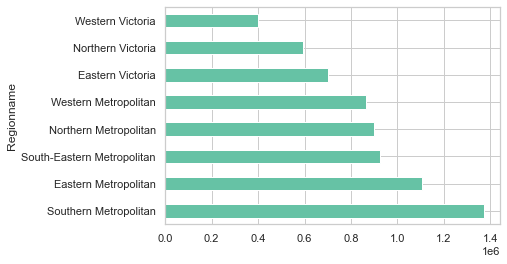

In [33]:
df.groupby('Regionname').mean().Price.sort_values(ascending = False).plot(kind ='barh')

In [34]:
max_region = df.groupby('Regionname').mean().Price.sort_values(ascending = False).index[0]

In [35]:
max_region = df.loc[df.Regionname == max_region]

In [36]:
max_region.groupby('CouncilArea').mean().Price.sort_values(ascending = False).head(1)

CouncilArea
Bayside   1,652,168.07
Name: Price, dtype: float64

In [37]:
max_region.groupby('Type').mean().Price.sort_values(ascending = False).head(1)

Type
h   1,802,241.08
Name: Price, dtype: float64

In [38]:
max_region.Method.value_counts().head(1)

S    3038
Name: Method, dtype: int64

# Nomor 7

In [39]:
df.Regionname.value_counts()

Southern Metropolitan         4695
Northern Metropolitan         3890
Western Metropolitan          2948
Eastern Metropolitan          1471
South-Eastern Metropolitan     450
Eastern Victoria                53
Northern Victoria               41
Western Victoria                32
Name: Regionname, dtype: int64

In [40]:
region_idx = df.Regionname.value_counts().index

region_idx

Index(['Southern Metropolitan', 'Northern Metropolitan',
       'Western Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria', 'Northern Victoria',
       'Western Victoria'],
      dtype='object')

In [41]:
statistics, pvalue = stats.f_oneway(
df.loc[df.Regionname == region_idx[0], 'Price'],
df.loc[df.Regionname == region_idx[1], 'Price'],
df.loc[df.Regionname == region_idx[2], 'Price'],
df.loc[df.Regionname == region_idx[3], 'Price'],
df.loc[df.Regionname == region_idx[4], 'Price'],
df.loc[df.Regionname == region_idx[5], 'Price'],
df.loc[df.Regionname == region_idx[6], 'Price'],
df.loc[df.Regionname == region_idx[7], 'Price'])

if pvalue < a :
    print('reject H0')
else :
    print('cannot reject H0')

reject H0


<AxesSubplot:xlabel='Price', ylabel='Regionname'>

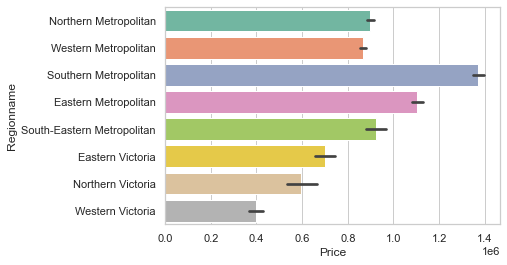

In [42]:
sns.barplot(df.Price, df.Regionname)

In [ ]:
Secara Statistik, terdapat perbedaan nyata antara Region Name